# 最小二乗法

## サンプルデータ

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

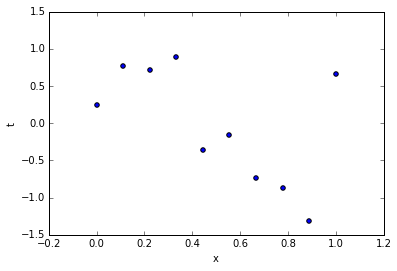

In [2]:
N = 10 # サンプルを取得する位置x１の個数

def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i) / float(num - 1)
        # y = sin(2 pi x)に標準偏差0.3の乱数を加えて生成
        y = np.sin(2 * np.pi * x) + normal(scale = 0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                ignore_index=True)
    return dataset

set = create_dataset(N)
plt.scatter(set.x, set.y)
plt.xlabel("x")
plt.ylabel("t")

## 多項式による近似

上記の通り、10箇所の観測点$x$に対し、それぞれに観測値$t$が与えられているとする。$x$と$t$の間にある関係関数を推測する。以下の様な$x$の多項式を想定する。

$$
\begin{align*}
f(x) &= w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M \\
&= \sum_{m=0}^Mw_mx^m \tag{1}
\end{align*}
$$

(1)式で計算される$t$の値と実際に観測された$t_n$の差の二乗和を誤差とする。

$$
\left\{f(x_1) - t_1\right\}^2 + \left\{f(x_2) - t_2\right\}^2 + \cdots + \left\{f(x_n) - t_n\right\}^2 \\
$$

この値がなるべく小さくなるような$f(x)$が得られるようにパラメーター$\left\{w_m\right\}_{m=0}^M$を決定したい。「誤差$E_D$」を以下のとおり定義する(観測点の数を$N$としている)。

$$
E_D = \frac{1}{2}\sum_{n=1}^N\left\{f(x_n)-t_n\right\}^2 \tag{2}
$$

(2)に(1)を代入すると

$$
E_D= \frac{1}{2}\sum_{n=1}^N\left(\sum_{m=0}^Mw_mx_n^m - t_n \right)^2 \tag{3}
$$




(3)を最小にする$\left\{w_m\right\}_{m=0}^M$を決定したい。これは(3)を$\left\{w_m\right\}_{m=0}^M$の関数とみなした際の偏微分係数が0になるという条件で決定される。

$$
\begin{align*}
\frac{\partial E_D}{\partial w_m} = 0 &\ \ \ (m = 0, \cdots , M) \tag{4}
\end{align*}
$$

(4)に(3)を代入して偏微分を計算すると(代入する際、添字$m$が被らないように(3)の$m$を$m'$に変更している)(式の展開は[補足](#【補足】偏微分方程式の展開)参照)

$$
\begin{align*}
\frac{\partial E_D}{\partial w_m} &= \left\{\ \frac{1}{2}\sum_{n=1}^N\left( \sum_{m'=0}^Mw_{m'}x_n^{m'} - t_n \right)^2 \right\}' \\
&= \sum_{n=1}^N\left( \sum_{m'=0}^Mw_{m'}x_n^{m'} - t_n \right) x_n^m \\
&= 0
\end{align*}
$$

上式を変形して

$$
\sum_{m'=0}^Mw_{m'}\sum_{n=1}^N x_n^{m'}x_n^m - \sum_{n=1}^Nt_nx_n^m = 0 \tag{5}
$$

ここで$x_n^m$を$(n,m)$成分とする$N*(M+1)$行列$\Phi$を用いると、以下のとおり行列形式で書き直せる。

$$
\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi} - \mathbf{t}^{\mathrm{T}}\mathbf{\Phi} = \mathbf{0} \tag{6} 
$$

ここで

$$
\begin{align*}
\mathbf{w} &= (w_0, \cdots ,w_m)^{\mathrm{T}} \\
\mathbf{t} &= (t_1, \cdots, t_N)^{\mathrm{T}}\\
\end{align*}
$$

$$
\mathbf{\Phi} = \left(
    \begin{array}{cccc}
      x_1^0 & x_1^1 & \ldots & x_1^M \\
      x_2^0 & x_2^1 & \ldots & x_2^M \\
      \vdots & \vdots & \ddots & \vdots \\
      x_N^0 & x_N^1 & \ldots & x_N^M \\
    \end{array}
  \right)
$$

(6)の式を変形して

$$
\begin{align*}
\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi} - \mathbf{t}^{\mathrm{T}}\mathbf{\Phi} &= \mathbf{0} \\
\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi} &= \mathbf{t}^{\mathrm{T}}\mathbf{\Phi} \\
\end{align*}
$$

両辺の転置をとって([行列の転置の性質](../basics/matrix.ipynb#定理2(行列の転置))を利用して)

$$
\begin{align*}
\left(\mathbf{w}^{\mathrm{T}}\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{\mathrm{T}} &= \left(\mathbf{t}^{\mathrm{T}}\mathbf{\Phi}\right)^{\mathrm{T}} \\
\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{\mathrm{T}}\mathbf{w} &= \mathbf{\Phi}^{\mathrm{T}}\mathbf{t} \\
\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)\mathbf{w} &= \mathbf{\Phi}^{\mathrm{T}}\mathbf{t}
\end{align*}
$$

両辺に左から$\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}$をかけて

$$
\begin{align*}
\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)\mathbf{w} &= \left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{\mathrm{T}}\mathbf{t} \\
\mathbf{w} &= \left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{\mathrm{T}}\mathbf{t}
\end{align*} \tag{7}
$$

右辺の$\mathbf{\Phi}$と$\mathbf{t}$は観測データから決まるものなので、(7)は観測データを用いて多項式の係数$\mathbf{w}$を決定する公式なっている。


<font color="red">※ヘッセ行列はまだ理解できてない</font>

Table of the coefficients
        M=0       M=1        M=3            M=9
0 -0.088974  0.614938   0.035937       0.205340
1       NaN -1.407824   7.808275    -153.638638
2       NaN       NaN -23.929738    3597.018680
3       NaN       NaN  15.806429  -32388.802448
4       NaN       NaN        NaN  151538.733196
5       NaN       NaN        NaN -409646.962058
6       NaN       NaN        NaN  663370.103169
7       NaN       NaN        NaN -634995.857325
8       NaN       NaN        NaN  331279.148295
9       NaN       NaN        NaN  -72600.282157


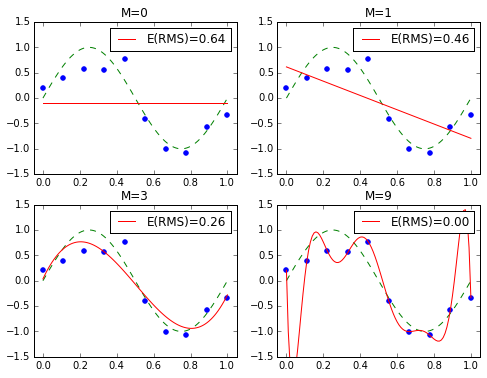

In [3]:
M = [0, 1, 3, 9] # 多項式の次数

# 平方根平均二乗誤差(Root mean square error)を計算する
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x)) ** 2
    return np.sqrt(2 * err / len(dataset))

# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m + 1):
        p = dataset.x ** i
        p.name = "x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)
    
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y
    
    return (f, ws)

train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()

fig = plt.figure(figsize=(8, 6))
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws, name="M=%d" % m))
    
    subplot = fig.add_subplot(2, 2, c+1)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m)
    
    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='b')
    
    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2 * np.pi * linex)
    subplot.plot(linex, liney, color='g', linestyle='--')
    
    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='r', label=label)
    subplot.legend(loc=1)

# 係数の値
print("Table of the coefficients")
print(df_ws.transpose())

上のグラフでE(RMS)(Root mean square error)は平方根平均二乗誤差、

$$
E_{RMS} = \sqrt{\frac{2E_D}{N}}
$$

多項式から予想される値とトレーニングセットの値が、平均的にどの程度異なっているかを表す。

## オーバーフィッティングの検出

事前にトレーニングセットとテストセットを用意しておき、トレーニングセットを用いて得られた多項式を用いて、トレーニングセットとテストセットの平方根平均二乗誤差を計算する。


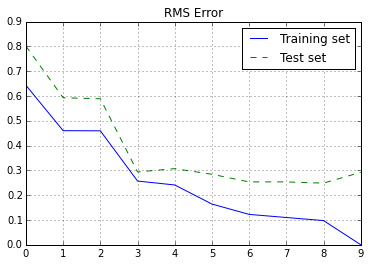

In [4]:
# トレーニングセットとテストセットでの誤差の変化を表示
df = DataFrame(columns=['Training set', 'Test set'])
for m in range(0, 10):
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(Series([train_error, test_error],
                          index=['Training set', 'Test set']),
                   ignore_index=True)
df.plot(title='RMS Error', style=['-', '--'], grid=True, ylim=(0, 0.9))


テストセットに対する「予測力」―モデルの汎化能力が、$M=4$を越えると、テストセットに対する誤差は減少せず、トレーニングセットに対する誤差だけが減少している。トレーニングセットだけが持つ特徴に合わせて、過剰なチューニングが行われている－オーバーフィッティング(過学習)

## 【補足】偏微分方程式の展開

$$
E_D= \frac{1}{2}\sum_{n=1}^N\left(\sum_{m=0}^Mw_mx_n^m - t_n \right)^2 \tag{3}
$$

を具体的に展開してみると、

$$
\begin{align*}
E_D = &\frac{1}{2}\left\{ \left( w_0x_1^0 - t_1 \right) + \left( w_1x_1^1 - t_1 \right) + \cdots + \left( w_Mx_1^M - t_1 \right) \right\}^2 + \\
&\frac{1}{2}\left\{ \left( w_0x_2^0 - t_2 \right) + \left( w_1x_2^1 - t_2 \right) + \cdots + \left( w_Mx_2^M - t_2 \right) \right\}^2  + \cdots + \\
&\frac{1}{2}\left\{ \left( w_0x_N^0 - t_N \right) + \left( w_1x_N^1 - t_N \right) + \cdots + \left( w_Mx_N^M - t_N \right) \right\}^2   \tag{*1}
\end{align*}
$$

(4)は$m=0, m=1, \cdots, m=M$のそれぞれで上式を偏微分した結果を$0$とおいた連立一次方程式を求めることを意味する、

$$
\begin{align*}
\frac{\partial E_D}{\partial w_m} = 0 &\ \ \ (m = 0, \cdots , M) \tag{4}
\end{align*}
$$

$m=0$の場合、$w_0$で偏微分すると、

$$
\begin{align*}
\frac{\partial{E_D}}{\partial{w_0}} = &\left\{ \left( w_0x_1^0 - t_1 \right) + \left( w_1x_1^1 - t_1 \right) + \cdots + \left( w_Mx_1^M - t_1 \right) \right\} x_1^0 + \\
&\left\{ \left( w_0x_2^0 - t_2 \right) + \left( w_1x_2^1 - t_2 \right) + \cdots + \left( w_Mx_2^M - t_2 \right) \right\} x_2^0 + \cdots + \\ 
&\left\{ \left( w_0x_N^0 - t_N \right) + \left( w_1x_N^1 - t_N \right) + \cdots + \left( w_Mx_N^M - t_N \right) \right\} x_N^0 = 0
\end{align*}
$$

$m=1$の場合、$w_1$で偏微分すると、

$$
\begin{align*}
\frac{\partial{E_D}}{\partial{w_1}} = &\left\{ \left( w_0x_1^0 - t_1 \right) + \left( w_1x_1^1 - t_1 \right) + \cdots + \left( w_Mx_1^M - t_1 \right) \right\} x_1^1 + \\
&\left\{ \left( w_0x_2^0 - t_2 \right) + \left( w_1x_2^1 - t_2 \right) + \cdots + \left( w_Mx_2^M - t_2 \right) \right\} x_2^1 + \cdots + \\ 
&\left\{ \left( w_0x_N^0 - t_N \right) + \left( w_1x_N^1 - t_N \right) + \cdots + \left( w_Mx_N^M - t_N \right) \right\} x_N^1 = 0
\end{align*}
$$

$m=M$の場合、$w_M$で偏微分すると、

$$
\begin{align*}
\frac{\partial{E_D}}{\partial{w_M}} = &\left\{ \left( w_0x_1^0 - t_1 \right) + \left( w_1x_1^1 - t_1 \right) + \cdots + \left( w_Mx_1^M - t_1 \right) \right\} x_1^M + \\
&\left\{ \left( w_0x_2^0 - t_2 \right) + \left( w_1x_2^1 - t_2 \right) + \cdots + \left( w_Mx_2^M - t_2 \right) \right\} x_2^M + \cdots + \\ 
&\left\{ \left( w_0x_N^0 - t_N \right) + \left( w_1x_N^1 - t_N \right) + \cdots + \left( w_Mx_N^M - t_N \right) \right\} x_N^M = 0
\end{align*}
$$

以上を一般に表すと(代入する際、添字$m$が被らないように(3)の$m$を$m'$に変更している)

$$
\begin{align*}
\frac{\partial E_D}{\partial w_m} = \sum_{n=1}^N\left( \sum_{m'=0}^Mw_{m'}x_n^{m'} - t_n \right) x_n^m = 0 &\ \ \ (m = 0, \cdots , M)
\end{align*}
$$


















